## Assignment 1

Name : Ayush Joshi 

Student ID : C0905800

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned.csv')   # loading the dataset
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


## Data Cleaning 

**Note:** The data is already cleaned because it's mentioned in the name. Nonetheless, performing all data cleaning operation to cross check.

In [3]:
df.info()   # Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


**Observation :** There are no null values in any of the columns. Also the datatypes are correct

In [4]:
df.describe()   # Descriptive summary

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [5]:
df.duplicated().sum()   # Finding duplicate records 

0

**Observation :** There are no duplicated rows in any of the columns as well

In [6]:
df['Classes'].value_counts()  # Counting records in each classes

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

**Observation :** There are some duplicate values in the Class column

In [7]:
df['Classes'] = df['Classes'].str.strip()    # Striping trailing spaces

In [8]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

**Observation:** The dataset is not imbalanced so no need to balance it

In [9]:
df['Classes'] = df['Classes'].map({'fire': 1, 'not fire': 0})   # Converting Target variable values into numerical values

In [10]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

## Data Visualization

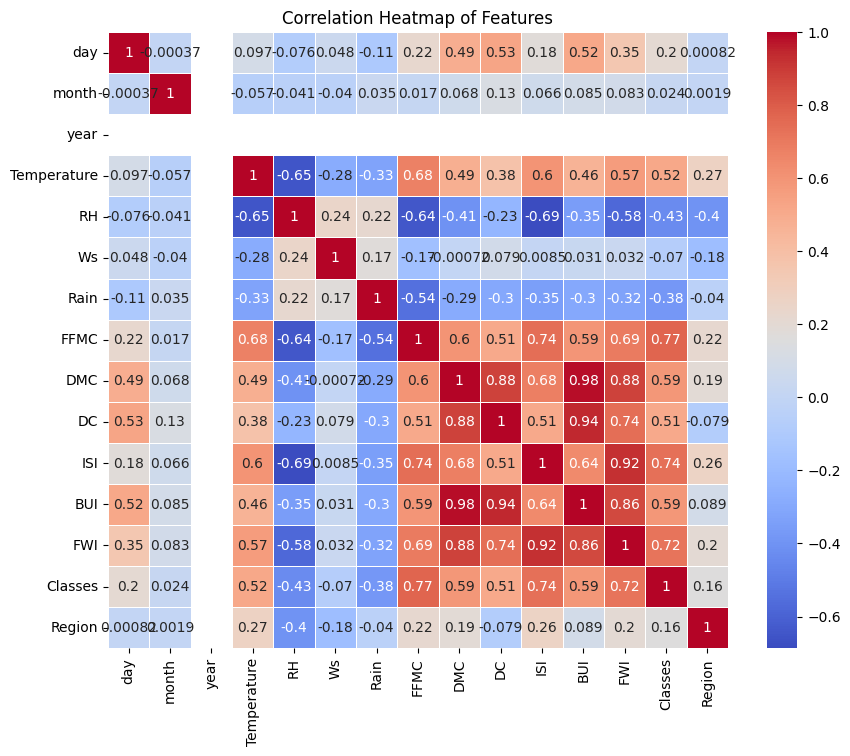

In [11]:
# Displaying a correlation heatmap of all the features with each other
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

**Observation:** Columns like 'DMC' and 'BUI', 'BUI' and 'DC', 'FWI' and 'ISI', 'DMC' and 'DC', 'DMC' and 'FWI', 'BUI' and 'FWI' are highly positively correlated that means we don't need all these columns and we can reduce multi-collinearity

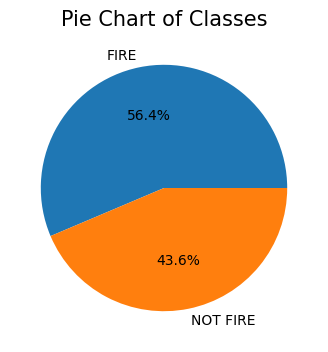

In [12]:
# Dispalying PIE chart of different classes and how much they contribute
perc = df['Classes'].value_counts(normalize=True)*100

class_labels = ["FIRE", "NOT FIRE"]

plt.figure(figsize =(6, 4))
plt.pie(perc, labels = class_labels, autopct='%1.1f%%')  
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show() 

**Observation:** 'Fire' Class is higher in number as compared to the other class

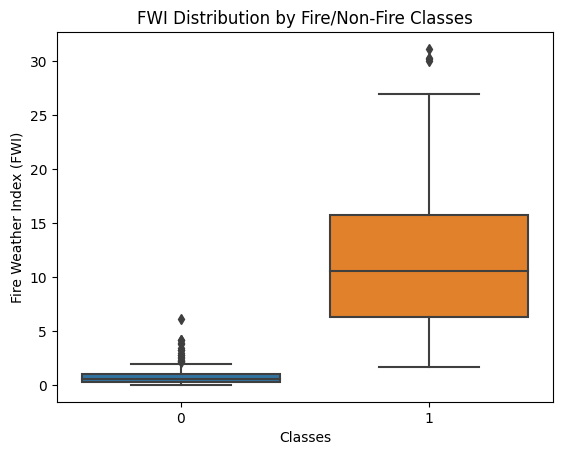

In [13]:
# Dispalying a box-plot indicating how much FWI effects both the classes
sns.boxplot(x='Classes', y='FWI', data=df)
plt.title('FWI Distribution by Fire/Non-Fire Classes')
plt.xlabel('Classes')
plt.ylabel('Fire Weather Index (FWI)')
plt.show()


**Observation:** Higher FWI values are associated with fire occurrences

## Data Preprocessing

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Classes'])  
y = df['Classes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # splitting the data

In [15]:
X_train

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
115,24,9,2012,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7,0
207,26,8,2012,33,37,16,0.0,92.2,61.3,167.2,13.1,64.0,30.3,1
158,7,7,2012,38,43,13,0.5,85.0,13.0,35.4,4.1,13.7,5.2,1
132,11,6,2012,31,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7,1
84,24,8,2012,34,64,14,0.0,88.9,40.5,171.3,9.0,50.9,20.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,15,9,2012,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0.0,0
14,15,6,2012,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0.1,0
92,1,9,2012,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0.1,0
179,29,7,2012,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,10.9,1


In [16]:
y_train

115    0
207    1
158    1
132    1
84     1
      ..
106    0
14     0
92     0
179    1
102    0
Name: Classes, Length: 194, dtype: int64

In [17]:
sc = StandardScaler()

# scaling the data with StandardScaler
X_train_sc = sc.fit_transform(X_train)  
X_test_sc = sc.transform(X_test)

## Model Building 

**Note :** Since my dataset is mostly balanced, I will focus more on accuracy followed by F1 score metrics

**Trial 1:** Model Evaluation with all features

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

lr = LogisticRegression()
lr.fit(X_train_sc, y_train)

y_pred = lr.predict(X_test_sc)  # test prediction

y_train_pred = lr.predict(X_train_sc)  # train prediction

print("Test Predictions:\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(f"Accuracy Score:\n{accuracy_score(y_test, y_pred)}")
print(f"F1 Score:\n{f1_score(y_test, y_pred)}")

print("\nTrain Predictions:\n")
print(f"Accuracy Score:\n{accuracy_score(y_train, y_train_pred)}")
print(f"F1 Score:\n{f1_score(y_train, y_train_pred)}")

Test Predictions:

Confusion Matrix:
[[20  2]
 [ 1 26]]

Accuracy Score:
0.9387755102040817
F1 Score:
0.9454545454545454

Train Predictions:

Accuracy Score:
0.979381443298969
F1 Score:
0.9818181818181818


**Observation:** The significant gap between training and testing performance metrics (accuracy and F1 score) suggests that this model may be overfitting to the training data.

**Trial 2:** Model Evaluation with removal of less significant features

In [37]:
X_imp = X.drop(columns=['day', 'month', 'year'])  # dropping less important features

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [21]:
# Splitting the data into train and test and scaling it
X_train_imp, X_test_imp, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=42)

X_train_imp_sc = sc.fit_transform(X_train_imp)   
X_test_imp_sc = sc.transform(X_test_imp)

In [32]:
lr.fit(X_train_imp_sc, y_train)

# model prediction with only important features

y_pred_imp = lr.predict(X_test_imp_sc)  # test prediction

y_train_pred_imp = lr.predict(X_train_imp_sc)  # train prediction

print("Test Predictions:\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_imp)}\n")
print(f"Accuracy Score:\n{accuracy_score(y_test, y_pred_imp)}")
print(f"F1 Score:\n{f1_score(y_test, y_pred_imp)}")

print("\nTrain Predictions:\n")
print(f"Accuracy Score:\n{accuracy_score(y_train, y_train_pred_imp)}")
print(f"F1 Score:\n{f1_score(y_train, y_train_pred_imp)}")

Test Predictions:

Confusion Matrix:
[[20  2]
 [ 1 26]]

Accuracy Score:
0.9387755102040817
F1 Score:
0.9454545454545454

Train Predictions:

Accuracy Score:
0.979381443298969
F1 Score:
0.9818181818181818


**Observation:** We are getting same metrics with less features now. Meaning those feature were not impacting anything on the target variable

**Trial 3:** Cross Validation and Hyperparameter Tuning (Includes Regularization using Tuning)

In [35]:
from sklearn.model_selection import GridSearchCV

# different parameter for cross-validation
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced', {0:1, 1:2}], # {0:1, 1:2} indicating twice the weightage for class 1 compared to class 0
}

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_imp_sc, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best parameters: {'C': 10, 'class_weight': None, 'penalty': 'l2'}
Best cross-validation score: 0.9793522267206478


**Observation:** Through Cross-Validation we have got the best parameter and an average accuracy score of 97%

In [36]:
best_model = grid_search.best_estimator_  # storing best parameter into a variable

y_pred_best = best_model.predict(X_test_imp_sc)  # test prediction

y_train_pred_best = best_model.predict(X_train_imp_sc)  # train prediction

# Evaluate the best model
print("Test Predictions:\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_best)}\n")
print(f"Accuracy Score:\n{accuracy_score(y_test, y_pred_best)}")
print(f"F1 Score:\n{f1_score(y_test, y_pred_best)}")

print("\nTrain Predictions:\n")
print(f"Accuracy Score:\n{accuracy_score(y_train, y_train_pred_best)}")
print(f"F1 Score:\n{f1_score(y_train, y_train_pred_best)}")

Test Predictions:

Confusion Matrix:
[[21  1]
 [ 1 26]]

Accuracy Score:
0.9591836734693877
F1 Score:
0.9629629629629629

Train Predictions:

Accuracy Score:
0.9845360824742269
F1 Score:
0.9864253393665158


**Best Model:** Logistic Regression with parameter C=10, class_weight=None and Ridge regularization achieved highest 95% accuracy for this dataset

**Observation:** With best parameter, the model was able to reduce FN and FP from old models. There is still small overfitting but the gap between Train and Test score have reduced by using best parameters. 

## Pickle file

In [40]:
import pickle

# stroing model's output
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

## Github Link